<a href="https://colab.research.google.com/github/Dimisz/Portfolio/blob/main/Python/DeepLearning/TensorFlow/TimeSeries/bitcoin_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data

Data downloaded from https://www.coindesk.com/price/bitcoin/ on October 20, 2021

For the CSV file used in the project, [see the GitHub repo](https://raw.githubusercontent.com/Dimisz/Portfolio/main/Python/DeepLearning/TensorFlow/TimeSeries/BTC_USD_2014-11-04_2021-10-20-CoinDesk.csv).

In [190]:
!wget https://raw.githubusercontent.com/Dimisz/Portfolio/main/Python/DeepLearning/TensorFlow/TimeSeries/BTC_USD_2014-11-04_2021-10-20-CoinDesk.csv

--2021-10-20 05:18:41--  https://raw.githubusercontent.com/Dimisz/Portfolio/main/Python/DeepLearning/TensorFlow/TimeSeries/BTC_USD_2014-11-04_2021-10-20-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170153 (166K) [text/plain]
Saving to: ‘BTC_USD_2014-11-04_2021-10-20-CoinDesk.csv.1’

BTC_USD_2014-11-04_ 100%[===================>] 166.17K  --.-KB/s    in 0.04s   

2021-10-20 05:18:42 (3.81 MB/s) - ‘BTC_USD_2014-11-04_2021-10-20-CoinDesk.csv.1’ saved [170153/170153]



### Read the data to a DataFrame using pandas

In [191]:
import pandas as pd

#Read the data, parse the date column and assign it to be the index
df = pd.read_csv("/content/BTC_USD_2014-11-04_2021-10-20-CoinDesk.csv",
                 parse_dates=['Date'],
                 index_col=['Date'])

In [3]:
df.head(), len(df)

(           Currency  Closing Price (USD)  ...  24h High (USD)  24h Low (USD)
 Date                                      ...                               
 2014-11-04      BTC            324.71833  ...       332.75133      323.06333
 2014-11-05      BTC            332.45666  ...       335.81166      320.93333
 2014-11-06      BTC            336.58500  ...       341.49000      328.56166
 2014-11-07      BTC            346.77500  ...       351.57500      336.02833
 2014-11-08      BTC            344.81166  ...       351.29500      339.86000
 
 [5 rows x 5 columns], 2543)

In [4]:
# Check if there are any missing values
df.isna().sum()

Currency               0
Closing Price (USD)    0
24h Open (USD)         0
24h High (USD)         0
24h Low (USD)          0
dtype: int64

### Create a new dataframe we'll be working with.
* We'll just keep the closing price (and data as an index column).
* `Closing Price (USD)` column willl be renamed to `Price`

In [5]:
btc_df = pd.DataFrame(df['Closing Price (USD)']).rename(columns={"Closing Price (USD)": "Price"})
btc_df.head()

,Price
Date,
2014-11-04,324.71833
2014-11-05,332.45666
2014-11-06,336.58500
2014-11-07,346.77500
2014-11-08,344.81166


### Visualize the bitcoin prices.

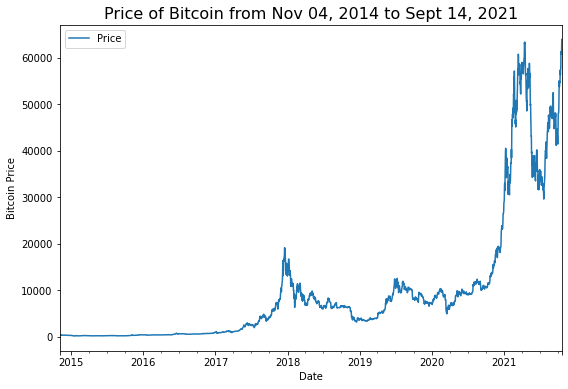

In [6]:
import matplotlib.pyplot as plt
btc_df.plot(figsize=(9,6))
plt.ylabel("Bitcoin Price")
plt.title("Price of Bitcoin from Nov 04, 2014 to Sept 14, 2021", fontsize=16);

### Read in the data with python's CSV module

In [7]:
import csv
from datetime import datetime

timesteps = []
btc_price= []

with open("/content/BTC_USD_2014-11-04_2021-10-20-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) #skip the first line (column titles)
  for line in csv_reader:
    #get the dates in date format (convert from string to date)
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) 
    #get the closing price as float
    btc_price.append(float(line[2]))


In [8]:
timesteps[:10], btc_price[:10]

([datetime.datetime(2014, 11, 4, 0, 0),
  datetime.datetime(2014, 11, 5, 0, 0),
  datetime.datetime(2014, 11, 6, 0, 0),
  datetime.datetime(2014, 11, 7, 0, 0),
  datetime.datetime(2014, 11, 8, 0, 0),
  datetime.datetime(2014, 11, 9, 0, 0),
  datetime.datetime(2014, 11, 10, 0, 0),
  datetime.datetime(2014, 11, 11, 0, 0),
  datetime.datetime(2014, 11, 12, 0, 0),
  datetime.datetime(2014, 11, 13, 0, 0)],
 [324.71833,
  332.45666,
  336.585,
  346.775,
  344.81166,
  343.065,
  358.50166,
  368.07666,
  376.99666,
  442.10666])

### Plot from CSV

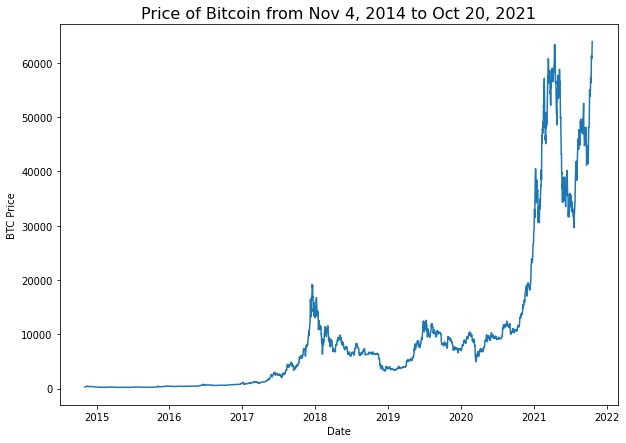

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from Nov 4, 2014 to Oct 20, 2021", fontsize=16)
plt.xlabel("Date");

## Format Data, Part 1

### Create, Train and Test sets of our Time Series Data

#### Creating train and test sets with time series data (the wrong way)

In [10]:
btc_df.head()

,Price
Date,
2014-11-04,324.71833
2014-11-05,332.45666
2014-11-06,336.58500
2014-11-07,346.77500
2014-11-08,344.81166


In [11]:
# Get bitcoin date array
timesteps = btc_df.index.to_numpy()
prices = btc_df['Price'].to_numpy()

In [12]:
timesteps[:10], prices[:10]

(array(['2014-11-04T00:00:00.000000000', '2014-11-05T00:00:00.000000000',
        '2014-11-06T00:00:00.000000000', '2014-11-07T00:00:00.000000000',
        '2014-11-08T00:00:00.000000000', '2014-11-09T00:00:00.000000000',
        '2014-11-10T00:00:00.000000000', '2014-11-11T00:00:00.000000000',
        '2014-11-12T00:00:00.000000000', '2014-11-13T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([324.71833, 332.45666, 336.585  , 346.775  , 344.81166, 343.065  ,
        358.50166, 368.07666, 376.99666, 442.10666]))

In [13]:
# The wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2034,), (509,), (2034,), (509,))

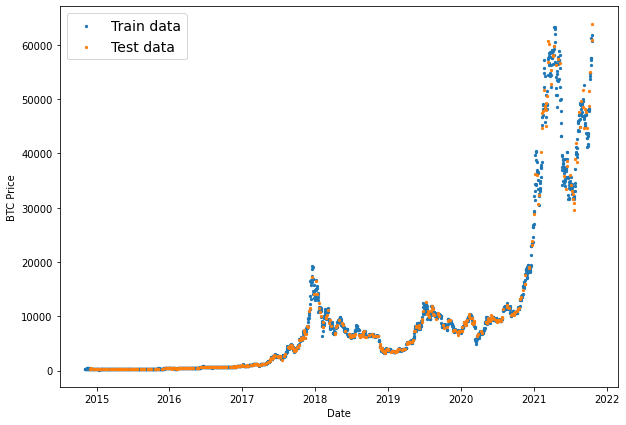

In [14]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

#### Creating train and test sets with time series data (the right way)

In [15]:
split_size = int(0.8 * len(prices)) # 80% training / 20% test

In [16]:
# Create train dataset
X_train, y_train = timesteps[:split_size], prices[:split_size]

#Create test dataset
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)


(2034, 509, 2034, 509)

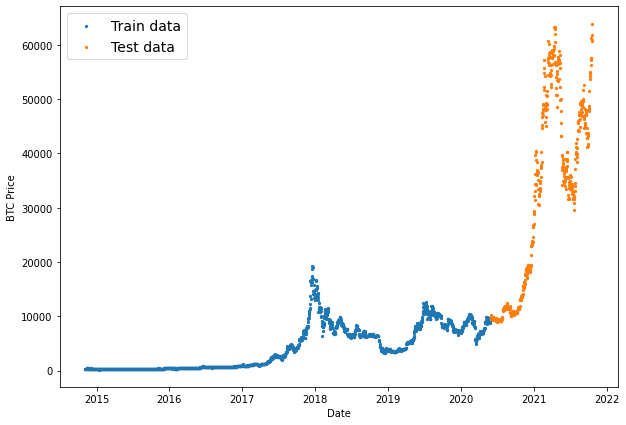

In [17]:
# Let's plot the train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

#### Create a plotting function

In [18]:
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) 
  against values (a series of values across time)

  Parameters
  ----------------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default : None

  """
  
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  
  plt.grid(True)

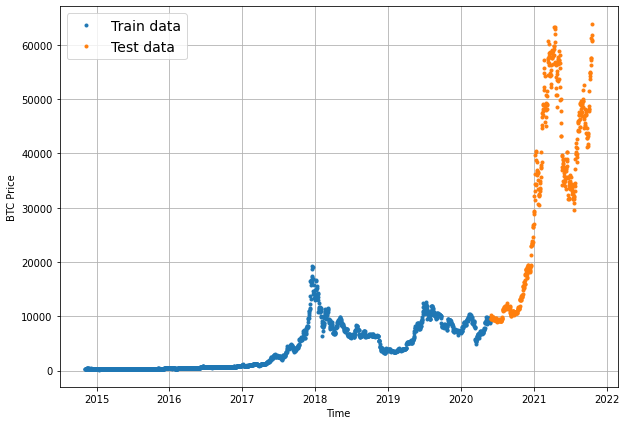

In [19]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling experiments

Terms to be familiar with:
* **`Horizon`** - number of steps into the future we are going to predicct.

* **`Window size`** - number of timesteps we're going to use to predict horizon

### Model 0. Naive Forecast (Baseline)

The formula:

$$\hat{y}_{t} = y_{t-1}$$

In English:
> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1

In [20]:
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([ 9425.28186919,  9688.32439037,  9427.67008414, 10268.58198473,
         9516.13544309,  9667.06075426,  9811.3670946 ,  9659.66129819,
         9677.05099451,  9737.45855879]),
 array([54854.87645698, 54712.72116638, 57284.92138598, 56304.23883767,
        57517.12447582, 57559.06444208, 61273.80527589, 60744.98493804,
        60965.46543362, 61707.48131182]))

In [21]:
y_test[-10:]

array([54712.72116638, 57284.92138598, 56304.23883767, 57517.12447582,
       57559.06444208, 61273.80527589, 60744.98493804, 60965.46543362,
       61707.48131182, 63901.07308021])

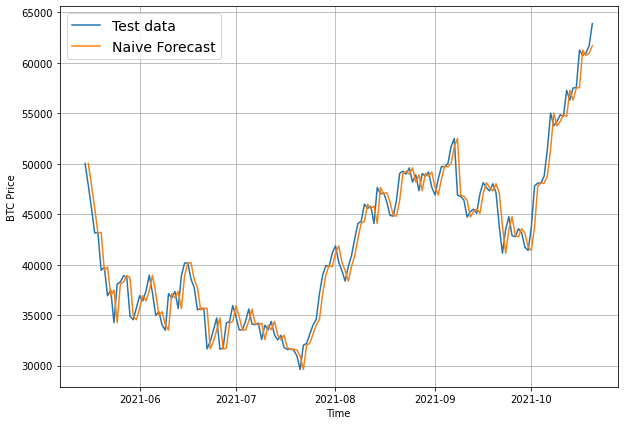

In [22]:
# Plot naive forecast
plt.figure(figsize=(10,7))
#plot_time_series(timesteps=X_train, values=y_train, label="Train data", start=200)
plot_time_series(timesteps=X_test, values=y_test, label="Test data", format='-', start=350)
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format='-', label="Naive Forecast", start=350)

#### Reference book: 'Forecasting: Principles in Practice'

### Evaluating a TimeSeries model

We're predicting a number, i.e. it's a form of regression problem.

Because we're working on a regression problem, we need regression metrics:

* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE/sMAPE - (symmetric) mean absolute percentage error

We're evaluating **how does our model forecast compared to the actual values?**

Reference: Forecasting: Principles and Practice, chapter 5.8

In [23]:
import tensorflow as tf

In [24]:
# MASE implementation (since there's no appropriate function in tensorflow)
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implementing MASE (assuming no seasonality of data, i.e. data is not influenced by season of the year).

  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  # Find MAE of naive forecast / seasonality (data published daily) is 1 days, hence shift 1 
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season



In [25]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9985992044069756

#### Custom Evaluation Function

In [26]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 dtype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [27]:
naive_results = evaluate_preds(y_true=y_test[1:], 
                               y_pred=naive_forecast)
naive_results

{'mae': 910.8107,
 'mape': 2.6240103,
 'mase': 0.9985991,
 'mse': 2015073.0,
 'rmse': 1419.5327}

In [28]:
# average price
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=31550.398414272375>

In [29]:
# max / min prices
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=9022.1537680028>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63901.073080209804>)

## Formatting Data Part 2 : Windowing the Dataset

```
Windowing for one week
[0,1,2,3,4,5,6] --> [7]
[1,2,3,4,5,6,7] --> [8]
[2,3,4,5,6,7,8] --> [9]
window = 7 --> horizon = 1
```

In [30]:
len(y_train)

2034

In [31]:
print(f"We want to use {btc_price[:7]} to predict {btc_price[7]}")

We want to use [324.71833, 332.45666, 336.585, 346.775, 344.81166, 343.065, 358.50166] to predict 368.07666


In [32]:
# Set global variables for window and horizon
HORIZON = 1 #predict next 1 day
WINDOW_SIZE = 7 # use the past week of data

### Create function to label windowed data

In [33]:
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon = 1
  Input: [0,1,2,3,4,5,6,7] -> Output: ([0,1,2,3,4,5,6], [7])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [34]:
# Test the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


### Apply the windowing function for the entire timeseries


We'll use numpy array indexing since using python for loops is time costly.

The function will:
* Create a window step of a specific window size (e.g. [0,1,2,3,4,5,6])
* Use numpy indexing to create a 2D array of multiple window steps, e.g.:
```
[[0,1,2,3,4,5,6],
 [1,2,3,4,5,6,7],
 [2,3,4,5,6,7,8]]
```
* Use the 2D array of multiple window steps (from 2.) to index on a target series (e.g. historical price of bitcoin).
* Use the `get_labelled_windows()` function to turn the window steps into windows with a specified horizon.

In [35]:
# Create the function
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  
  # 2. Use numpy indexing to create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indeces = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T #create 2D array of windows of windows_size

  #print(f"Window indeces:\n {window_indeces}{window_indeces.shape}")

  # 3. Index on the target array (a timeseries) with 2D array of multiple window steps
  windowed_array = x[window_indeces]
  #print(windowed_array)

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [36]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2536, 2536)

In [37]:
len(prices)

2543

In [38]:
# Check the first 3 windows and labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [54712.72116638 57284.92138598 56304.23883767 57517.12447582
 57559.06444208 61273.80527589 60744.98493804] -> Label: [60965.46543362]
Window: [57284.92138598 56304.23883767 57517.12447582 57559.06444208
 61273.80527589 60744.98493804 60965.46543362] -> Label: [61707.48131182]
Window: [56304.23883767 57517.12447582 57559.06444208 61273.80527589
 60744.98493804 60965.46543362 61707.48131182] -> Label: [63901.07308021]


In [39]:
prices[-1]

63901.073080209804

#### similar: tf.keras.preprocessing.timeseries_dataset_from_array

## Create train & train sets for windowed dataset

In [40]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and pairs into train and test split
  """
  split_size = int(len(windows) * (1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels


In [41]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)

In [42]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2028, 508, 2028, 508)

In [43]:
len(full_windows) * 0.8

2028.8000000000002

In [44]:
train_windows[:5], train_labels[:5]

(array([[324.71833, 332.45666, 336.585  , 346.775  , 344.81166, 343.065  ,
         358.50166],
        [332.45666, 336.585  , 346.775  , 344.81166, 343.065  , 358.50166,
         368.07666],
        [336.585  , 346.775  , 344.81166, 343.065  , 358.50166, 368.07666,
         376.99666],
        [346.775  , 344.81166, 343.065  , 358.50166, 368.07666, 376.99666,
         442.10666],
        [344.81166, 343.065  , 358.50166, 368.07666, 376.99666, 442.10666,
         389.00333]]), array([[368.07666],
        [376.99666],
        [442.10666],
        [389.00333],
        [394.92666]]))

In [45]:
test_windows[:5], test_labels[:5]

(array([[ 9220.07588747,  9048.71511916,  8905.78160454,  8835.72722404,
          9112.97917559,  9507.52466466,  9425.28186919],
        [ 9048.71511916,  8905.78160454,  8835.72722404,  9112.97917559,
          9507.52466466,  9425.28186919,  9688.32439037],
        [ 8905.78160454,  8835.72722404,  9112.97917559,  9507.52466466,
          9425.28186919,  9688.32439037,  9427.67008414],
        [ 8835.72722404,  9112.97917559,  9507.52466466,  9425.28186919,
          9688.32439037,  9427.67008414, 10268.58198473],
        [ 9112.97917559,  9507.52466466,  9425.28186919,  9688.32439037,
          9427.67008414, 10268.58198473,  9516.13544309]]),
 array([[ 9688.32439037],
        [ 9427.67008414],
        [10268.58198473],
        [ 9516.13544309],
        [ 9667.06075426]]))

In [46]:
# Check if train labels are the same before and after window split
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

## Make a modelling checkpoint

Since our model's performance will fluctuate from experiment to experiment, we're going to make a checkpoint.

So that we can compare each of our model's best performances to the other model's best performances.

In [47]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path='model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

* Single Dense with 128 hidden units and relu activation.
* An output layer with linear activation.
* Adam optimizer and MAE loss function.
* Batch size of 128

In [48]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

# Set the random seed
tf.random.set_seed(42)

# Construct a model
model_1 = tf.keras.Sequential([
    Dense(128, activation="relu"),
    Dense(HORIZON, activation="linear")
], name="model_1_dense" #will be used for model checkpoints
)

# Compile the model
model_1.compile(loss='mae',
                optimizer='adam',
                metrics=['mae', 'mse'])

In [49]:
# Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
16/16 [==============================] - 3s 16ms/step - loss: 1067.3662 - mae: 1067.3662 - mse: 3364913.5000 - val_loss: 4036.9490 - val_mae: 4036.9490 - val_mse: 27940074.0000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 372.6498 - mae: 372.6498 - mse: 446807.8125 - val_loss: 2150.7251 - val_mae: 2150.7251 - val_mse: 8765000.0000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 241.0681 - mae: 241.0681 - mse: 229216.1094 - val_loss: 1676.5664 - val_mae: 1676.5664 - val_mse: 6018680.5000
INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 224.5624 - mae: 224.5624 - mse: 208980.7188 - val_loss: 1561.8663 - val_mae: 1561.8663 - val_mse: 5399585.0000
INFO:tensorflow:Assets written to: mo

In [50]:
naive_results


{'mae': 910.8107,
 'mape': 2.6240103,
 'mase': 0.9985991,
 'mse': 2015073.0,
 'rmse': 1419.5327}

In [51]:
# Evaluate model on test_data
model_1.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 960.8912 - mae: 960.8912 - mse: 2155634.2500


[960.8912353515625, 960.8912353515625, 2155634.25]

In [52]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("/content/model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 3ms/step - loss: 919.3892 - mae: 919.3892 - mse: 2058842.2500


[919.38916015625, 919.38916015625, 2058842.25]

## Making predictions with a model (on the test dataset)

The function will:
* Take in a train model
* Take in some input data (same kind of data the model was trained on)
* Pass the input data to the model's predict method
* Return the predictions

In [53]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data
  """

  preds = model.predict(input_data)
  return tf.squeeze(preds) # return 1D array of preds

In [54]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

(508, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 9473.997,  9655.156,  9506.526, 10155.072,  9678.816,  9641.493,
         9775.378,  9746.786,  9634.366,  9747.53 ], dtype=float32)>)

In [55]:
tf.squeeze(test_labels).shape, model_1_preds.shape

(TensorShape([508]), TensorShape([508]))

In [56]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)

In [57]:
model_1_results

{'mae': 919.3893,
 'mape': 2.6436763,
 'mase': 1.0080045,
 'mse': 2058842.2,
 'rmse': 1434.8667}

In [58]:
naive_results

{'mae': 910.8107,
 'mape': 2.6240103,
 'mase': 0.9985991,
 'mse': 2015073.0,
 'rmse': 1419.5327}

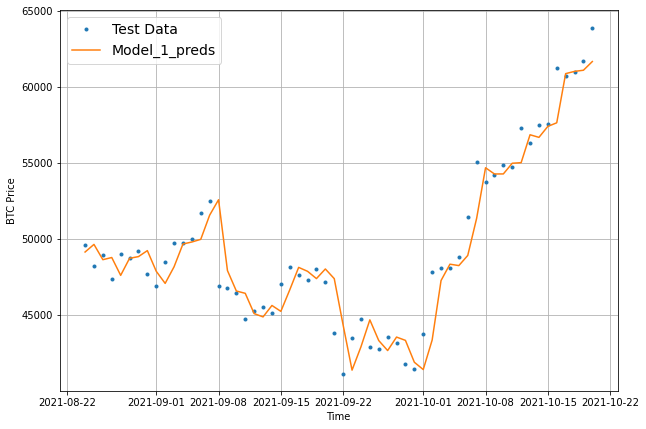

In [59]:
# Let's plot our model 1 predictions
offset = 450
plt.figure(figsize=(10,7))
# Account for test_window offfset and index into test_labels
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:,0],
                 start=offset,
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format='-',
                 label="Model_1_preds")

## Model 2: Dense, window size=30, horizon=1

In [60]:
HORIZON=1
WINDOW_SIZE=30

In [61]:
full_windows_30, full_labels_30 = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows_30), len(full_labels_30)

(2513, 2513)

In [62]:
train_windows_30, test_windows_30, train_labels_30, test_labels_30 = make_train_test_splits(windows=full_windows_30, labels=full_labels_30)

In [63]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

# Set the random seed
tf.random.set_seed(42)

# Construct a model
model_2 = tf.keras.Sequential([
    Dense(128, activation="relu"),
    Dense(HORIZON, activation="linear")
], name="model_2_dense" #will be used for model checkpoints
)

# Compile the model
model_2.compile(loss='mae',
                optimizer='adam',
                metrics=['mae', 'mse'])

In [64]:
# Fit the model
model_2.fit(x=train_windows_30,
            y=train_labels_30,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows_30, test_labels_30),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
16/16 [==============================] - 1s 14ms/step - loss: 1474.2347 - mae: 1474.2347 - mse: 6687780.5000 - val_loss: 7740.8027 - val_mae: 7740.8027 - val_mse: 92146312.0000
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 628.6282 - mae: 628.6282 - mse: 1268511.2500 - val_loss: 3600.4363 - val_mae: 3600.4363 - val_mse: 25809958.0000
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 437.6740 - mae: 437.6740 - mse: 719166.8750 - val_loss: 2473.1416 - val_mae: 2473.1416 - val_mse: 13562996.0000
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 348.8208 - mae: 348.8208 - mse: 444506.5000 - val_loss: 2207.9246 - val_mae: 2207.9246 - val_mse: 10798918.0000
INFO:tensorflow:Assets written to

In [65]:
# Load in saved best performing model_1 and evaluate it on test data
model_2 = tf.keras.models.load_model("/content/model_experiments/model_2_dense")
model_2.evaluate(test_windows_30, test_labels_30)

16/16 [==============================] - 0s 3ms/step - loss: 986.0328 - mae: 986.0328 - mse: 2312257.7500


[986.0327758789062, 986.0327758789062, 2312257.75]

In [66]:
# Make predictions using model_1 on the test dataset and view results
model_2_preds = make_preds(model_2, test_windows_30)
len(model_2_preds), model_2_preds[:10]

(503, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([9591.194, 9750.433, 9731.253, 9745.089, 9743.374, 9774.651,
        9807.139, 9884.002, 9395.562, 9468.833], dtype=float32)>)

In [67]:
# Evaluate preds
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels_30),
                                 y_pred=model_2_preds)

In [68]:
model_2_results

{'mae': 986.0328,
 'mape': 2.8046005,
 'mase': 1.0754082,
 'mse': 2312257.8,
 'rmse': 1520.611}

In [69]:
naive_results

{'mae': 910.8107,
 'mape': 2.6240103,
 'mase': 0.9985991,
 'mse': 2015073.0,
 'rmse': 1419.5327}

In [70]:
model_1_results

{'mae': 919.3893,
 'mape': 2.6436763,
 'mase': 1.0080045,
 'mse': 2058842.2,
 'rmse': 1434.8667}

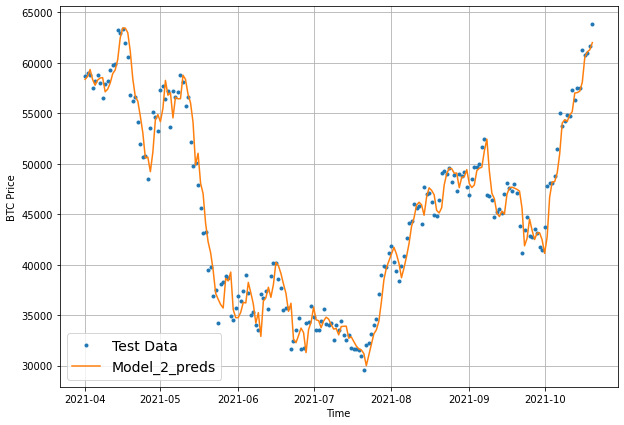

In [71]:
# Let's plot our model 1 predictions
offset = 300
plt.figure(figsize=(10,7))
# Account for test_window offfset and index into test_labels
plot_time_series(timesteps=X_test[-len(test_windows_30):],
                 values=test_labels_30[:,0],
                 start=offset,
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows_30):],
                 values=model_2_preds,
                 start=offset,
                 format='-',
                 label="Model_2_preds")

## Model 3: Dense, window_size=30, horizon=7

In [72]:
HORIZON=7
WINDOW_SIZE=30

In [73]:
full_windows_30_7, full_labels_30_7 = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows_30_7), len(full_labels_30_7)

(2507, 2507)

In [74]:
train_windows_30_7, test_windows_30_7, train_labels_30_7, test_labels_30_7 = make_train_test_splits(windows=full_windows_30_7, labels=full_labels_30_7)

In [75]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

# Set the random seed
tf.random.set_seed(42)

# Construct a model
model_3 = tf.keras.Sequential([
    Dense(128, activation="relu"),
    Dense(HORIZON, activation="linear")
], name="model_3_dense" #will be used for model checkpoints
)

# Compile the model
model_3.compile(loss='mae',
                optimizer='adam',
                metrics=['mae', 'mse'])

In [76]:
# Fit the model
model_3.fit(x=train_windows_30_7,
            y=train_labels_30_7,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows_30_7, test_labels_30_7),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [77]:
# Load in saved best performing model_3 and evaluate it on test data
model_3 = tf.keras.models.load_model("/content/model_experiments/model_3_dense")
model_3.evaluate(test_windows_30_7, test_labels_30_7)

16/16 [==============================] - 0s 3ms/step - loss: 2032.0574 - mae: 2032.0574 - mse: 10002460.0000


[2032.057373046875, 2032.057373046875, 10002460.0]

In [78]:
# Make predictions using model_3 on the test dataset and view results
model_3_preds = make_preds(model_3, test_windows_30_7)
len(model_3_preds), model_3_preds[:5]

(502, <tf.Tensor: shape=(5, 7), dtype=float32, numpy=
 array([[ 9552.9375,  9448.525 ,  9044.156 ,  9457.146 ,  9467.145 ,
          9766.378 ,  9334.44  ],
        [ 9683.485 ,  9684.401 ,  9317.876 ,  9633.251 ,  9631.704 ,
          9909.625 ,  9562.224 ],
        [ 9508.614 ,  9657.287 ,  9469.027 ,  9571.973 ,  9521.602 ,
          9843.264 ,  9582.741 ],
        [ 9960.912 , 10017.589 ,  9974.885 , 10103.352 ,  9962.641 ,
         10094.828 ,  9817.367 ],
        [ 9886.097 ,  9817.494 ,  9795.047 ,  9875.745 ,  9835.661 ,
         10029.768 ,  9817.549 ]], dtype=float32)>)

In [79]:
# Evaluate preds
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels_30_7),
                                 y_pred=model_3_preds)

In [80]:
model_3_preds.shape, model_2_preds.shape

(TensorShape([502, 7]), TensorShape([503]))

### Make evaluation function work for larger horizons

In [81]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 dtype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

# Account for different sized metrics (for longer horizons)
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mase = tf.reduce_mean(mase)
    mape = tf.reduce_mean(mape)



  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [82]:
# Get model 3 results aggregated to a single value
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels_30_7),
                                y_pred=model_3_preds)
model_3_results

{'mae': 2032.0574,
 'mape': 5.7309575,
 'mase': 2.226647,
 'mse': 10002459.0,
 'rmse': 2327.513}

In [83]:
import pandas as pd
res = pd.DataFrame({"naive": pd.Series(naive_results), 
                    "model_1":pd.Series(model_1_results),
                    "model_2":pd.Series(model_2_results),
                    "model_3":pd.Series(model_3_results)
                    })
res

,naive,model_1,model_2,model_3
mae,9.108107e+02,9.193893e+02,9.860328e+02,2.032057e+03
mse,2.015073e+06,2.058842e+06,2.312258e+06,1.000246e+07
rmse,1.419533e+03,1.434867e+03,1.520611e+03,2.327513e+03
mape,2.624010e+00,2.643676e+00,2.804600e+00,5.730958e+00
mase,9.985991e-01,1.008005e+00,1.075408e+00,2.226647e+00


### Visualize model 3 preds


In [84]:
model_3_predictions = tf.squeeze(model_3_preds)
model_3_predictions

<tf.Tensor: shape=(502, 7), dtype=float32, numpy=
array([[ 9552.9375,  9448.525 ,  9044.156 , ...,  9467.145 ,  9766.378 ,
         9334.44  ],
       [ 9683.485 ,  9684.401 ,  9317.876 , ...,  9631.704 ,  9909.625 ,
         9562.224 ],
       [ 9508.614 ,  9657.287 ,  9469.027 , ...,  9521.602 ,  9843.264 ,
         9582.741 ],
       ...,
       [56188.355 , 56095.805 , 54982.176 , ..., 56920.703 , 57066.9   ,
        55746.03  ],
       [57518.68  , 58494.117 , 56886.023 , ..., 57408.133 , 59037.027 ,
        57197.777 ],
       [57492.64  , 58093.902 , 57316.68  , ..., 57076.92  , 59678.32  ,
        57758.59  ]], dtype=float32)>

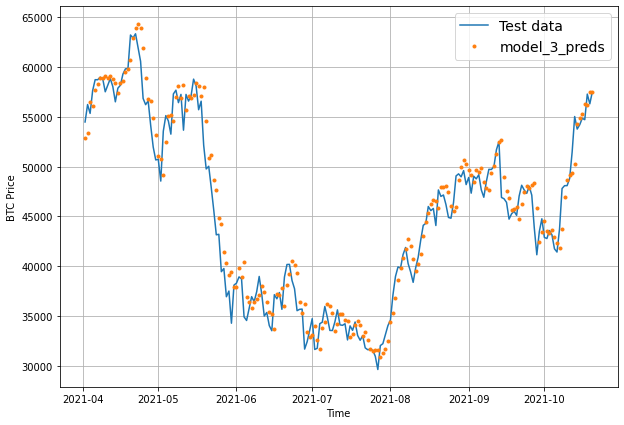

In [85]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows_30_7):], values=test_labels_30_7[:, 0], start=offset, label="Test data", format='-')
plot_time_series(timesteps=X_test[-len(test_windows_30_7):], values=model_3_preds[:,0], start=offset, label='model_3_preds')

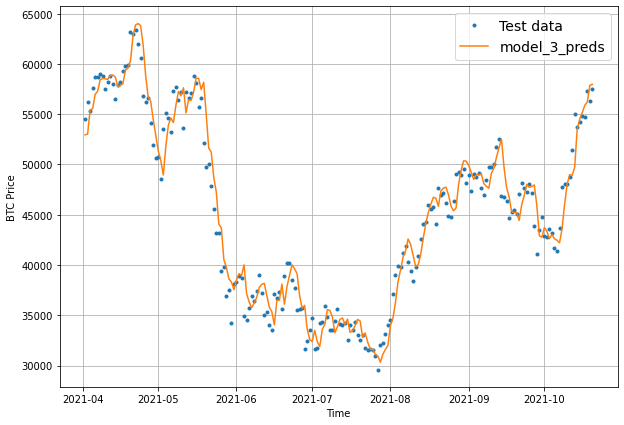

In [86]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows_30_7):], values=test_labels_30_7[:, 0], start=offset, label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows_30_7):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 start=offset, 
                 label='model_3_preds',
                 format='-')

### Comparing the models' performance



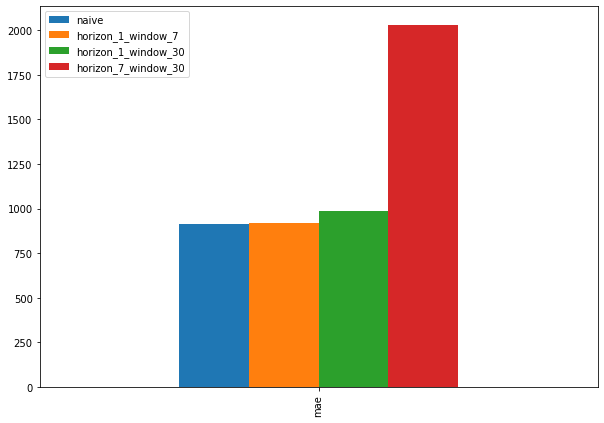

In [87]:
pd.DataFrame({"naive":naive_results['mae'],
              "horizon_1_window_7": model_1_results['mae'],
              "horizon_1_window_30": model_2_results['mae'],
              "horizon_7_window_30": model_3_results['mae']}, index=['mae']).plot(figsize=(10,7), kind='bar')

## Model 4: Conv1D

In [88]:
HORIZON = 1
WINDOW_SIZE = 7

In [89]:
# Create a windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [90]:
len(full_windows), len(full_labels)

(2536, 2536)

In [91]:
# Create train and test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2028, 2028, 508, 508)

To use Con1D we need an input shape of: `(batch_size, timesteps, input_dim)`

In [92]:
train_windows[0].shape # returns (WINDOW_SIZE)

(7,)

### Reshape the data before we pass it to Conv1D

In [93]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([324.71833, 332.45666, 336.585  , 346.775  , 344.81166, 343.065  ,
       358.50166])>

In [94]:
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))#add extra dimension for input

In [95]:
# Test out our lambda layer
print(f"Original shape: {x.shape}") #WINDOW_SIZE
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"Original values with expanded shape: \n{expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape: 
[[324.71832]
 [332.45667]
 [336.585  ]
 [346.775  ]
 [344.81165]
 [343.065  ]
 [358.50165]]


### Build the model

In [96]:
tf.random.set_seed(42)


model_4 = tf.keras.Sequential([
      tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
      tf.keras.layers.Conv1D(filters=128, kernel_size=5, strides=1, padding='causal', activation='relu'),
      tf.keras.layers.Dense(HORIZON)
], name='model_4_conv1d')

# Compile the model
model_4.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

In [97]:
# Fit the model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1d/assets
INFO:tensorflow:Assets wr

### Evaluate the model

In [98]:
model_4.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 3ms/step - loss: 979.6086


979.608642578125

### Load back the best-performing model and rre-evaluate

In [99]:
model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_conv1d")

In [100]:
model_4.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 3ms/step - loss: 921.2894


921.2893676757812

### Make predictions

In [101]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 9498.944,  9690.437,  9535.406, 10155.081,  9738.154,  9684.569,
        9805.151,  9735.357,  9719.052,  9741.828], dtype=float32)>

### Evaluate predictions

In [102]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 921.28937,
 'mape': 2.6526103,
 'mase': 1.0100877,
 'mse': 2074822.9,
 'rmse': 1440.4246}

In [103]:
model_1_results

{'mae': 919.3893,
 'mape': 2.6436763,
 'mase': 1.0080045,
 'mse': 2058842.2,
 'rmse': 1434.8667}

## Model 5 : RNN (LSTM)

In [104]:
tf.random.set_seed(42)

# Use functional API
inputs = tf.keras.layers.Input(shape=(WINDOW_SIZE))
x = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
#x = tf.keras.layers.LSTM(128, return_sequences=True)(x)
x = tf.keras.layers.LSTM(128, activation='relu')(x)
#x = tf.keras.layers.Dense(32, activation="relu")(x)
output = tf.keras.layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs=inputs, outputs=output, name='model_5_LSTM')

#Compile 
model_5.compile(loss='mae', optimizer=tf.keras.optimizers.Adam())

# Fit 
model_5.fit(train_windows, 
            train_labels, 
            epochs=100, 
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
16/16 [==============================] - 2s 23ms/step - loss: 3175.9482 - val_loss: 17073.4590
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 2/100
16/16 [==============================] - 0s 9ms/step - loss: 1451.3649 - val_loss: 4111.2109
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 332.5244 - val_loss: 1964.1078
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 251.4381 - val_loss: 1690.7739
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 5/100
16/16 [==============================] - 0s 8ms/step - loss: 230.8793 - val_loss: 1662.4203
INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 225.6825 - val_loss: 1582.3809
INFO:te

In [105]:
# Load in best version of model 5 and evaluate on test data
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 979.3494


979.349365234375

In [106]:
# Make predictions
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([ 9442.642,  9631.004,  9579.788, 10031.039,  9786.545],
      dtype=float32)>

In [107]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 979.3494,
 'mape': 2.8212917,
 'mase': 1.0737439,
 'mse': 2261719.8,
 'rmse': 1503.9016}

In [108]:
model_1_results

{'mae': 919.3893,
 'mape': 2.6436763,
 'mase': 1.0080045,
 'mse': 2058842.2,
 'rmse': 1434.8667}

## Make a multivariate dataset

In [109]:
btc_df.head()

,Price
Date,
2014-11-04,324.71833
2014-11-05,332.45666
2014-11-06,336.58500
2014-11-07,346.77500
2014-11-08,344.81166


In [110]:
# Add halving events as a feature
block_reward_1 = 50 # Jan 3, 2009 - (won't be included, too early
block_reward_2 = 25 # Nov 8, 2012
block_reward_3 = 12.5 #Jul 9, 2016
block_reward_4 = 6.25 #May 18, 2020

# Bloack reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")


In [111]:
# Create data ranges of where specific block reward values should be
block_reward_2_days = (block_reward_3_datetime - btc_df.index[0]).days
block_reward_3_days = (block_reward_4_datetime - btc_df.index[0]).days

print(block_reward_2_days, block_reward_3_days)

613 2022


In [112]:
# Add in a block_reward column
bitcoin_prices_block = btc_df.copy()
bitcoin_prices_block['block_reward'] = None

# Add in block_reward
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4

In [113]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2014-11-04,324.71833,25
2014-11-05,332.45666,25
2014-11-06,336.58500,25
2014-11-07,346.77500,25
2014-11-08,344.81166,25


In [114]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-10-16,61273.805276,6.25
2021-10-17,60744.984938,6.25
2021-10-18,60965.465434,6.25
2021-10-19,61707.481312,6.25
2021-10-20,63901.073080,6.25


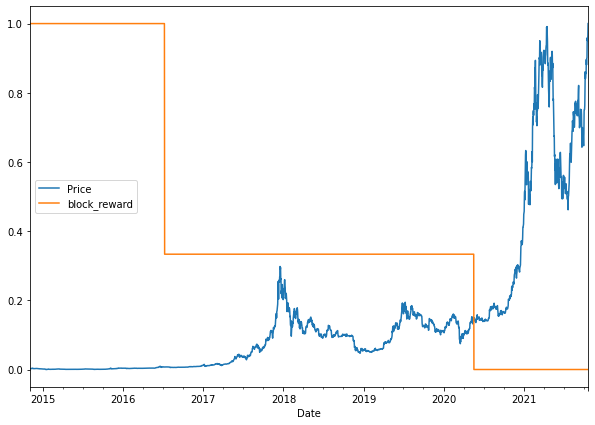

In [115]:
# Plot the block rreward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7))

## Making a windowed dataset with pandas

In [116]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [117]:
# Make a copy of bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)


In [118]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-11-04,324.71833,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-05,332.45666,25,324.71833,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-06,336.58500,25,332.45666,324.71833,NaN,NaN,NaN,NaN,NaN
2014-11-07,346.77500,25,336.58500,332.45666,324.71833,NaN,NaN,NaN,NaN
2014-11-08,344.81166,25,346.77500,336.58500,332.45666,324.71833,NaN,NaN,NaN


In [119]:
# Create X (windows) and y(horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-11-11,25.0,358.501648,343.065002,344.811646,346.774994,336.584991,332.456665,324.718323
2014-11-12,25.0,368.076660,358.501648,343.065002,344.811646,346.774994,336.584991,332.456665
2014-11-13,25.0,376.996674,368.076660,358.501648,343.065002,344.811646,346.774994,336.584991
2014-11-14,25.0,442.106659,376.996674,368.076660,358.501648,343.065002,344.811646,346.774994
2014-11-15,25.0,389.003326,442.106659,376.996674,368.076660,358.501648,343.065002,344.811646


In [120]:
# Make train and test sets using indexing
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2028, 2028, 508, 508)

## Model 6: Dense (multivariate timeseries)

In [121]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Commpile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit the model
model_6.fit(X_train, 
            y_train,
            epochs=100,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
64/64 [==============================] - 1s 5ms/step - loss: 690.8929 - val_loss: 1794.3561
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 251.2192 - val_loss: 2183.5632
Epoch 3/100
64/64 [==============================] - 0s 3ms/step - loss: 231.4989 - val_loss: 1563.5826
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 4/100
64/64 [==============================] - 0s 4ms/step - loss: 205.8508 - val_loss: 1416.3423
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 5/100
64/64 [==============================] - 0s 3ms/step - loss: 185.8172 - val_loss: 1320.6967
INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets
Epoch 6/100
64/64 [==============================] - 0s 3ms/step - loss: 176.2883 - val_loss: 1159.9753
INFO:tensorflow:Assets writt

In [122]:
# Evaluate
model_6.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 904.3854


904.3854370117188

In [123]:
# Load in and evaluate the best performing parameters
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_dense_multivariate")

In [124]:
model_6.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 903.6312


903.6311645507812

In [125]:
# Make predictions with multivariate model
model_6_predictions = tf.squeeze(model_6.predict(X_test))

In [126]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_predictions)

In [127]:
model_6_results

{'mae': 903.6312,
 'mape': 2.602878,
 'mase': 0.99072766,
 'mse': 2001406.0,
 'rmse': 1414.7104}

In [128]:
model_1_results

{'mae': 919.3893,
 'mape': 2.6436763,
 'mase': 1.0080045,
 'mse': 2058842.2,
 'rmse': 1434.8667}

In [129]:
naive_results

{'mae': 910.8107,
 'mape': 2.6240103,
 'mase': 0.9985991,
 'mse': 2015073.0,
 'rmse': 1419.5327}

## Model 7: N-BEATs algorithm

Replicating the algorithm from the <a href="https://arxiv.org/abs/1905.10437">following paper</a>.

### Building and testing the N-BEATS block layer

In [130]:
# Create NBeatBlock custom layer since it doesn't exist in TF

class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int, 
               n_layers: int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers (each has ReLU activation)
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    #Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast



In [131]:
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON,
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [132]:
# Create dummy inputs
# has to reflect Dense layer 
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [133]:
# Pass dummy inputs to dummy NBeats layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")


Backcast: [ 0.07960155  0.32512054 -0.84286827 -0.69389844 -0.31720546 -0.5698734
 -0.6396661 ]
Forecast: 1.0071649551391602


## Preparing data for the N-BEATS algorithm using `tf.data`

In [134]:
HORIZON = 1
WINDOW_SIZE = 7

In [135]:
# Crreate N-BEATS data inputs
btc_df.head()

,Price
Date,
2014-11-04,324.71833
2014-11-05,332.45666
2014-11-06,336.58500
2014-11-07,346.77500
2014-11-08,344.81166


In [136]:
# Add windowed columns
bitcoin_prices_nbeats = btc_df.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats['Price'].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-11-04,324.71833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-05,332.45666,324.71833,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-06,336.58500,332.45666,324.71833,NaN,NaN,NaN,NaN,NaN
2014-11-07,346.77500,336.58500,332.45666,324.71833,NaN,NaN,NaN,NaN
2014-11-08,344.81166,346.77500,336.58500,332.45666,324.71833,NaN,NaN,NaN


In [137]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop('Price', axis=1)
y = bitcoin_prices_nbeats.dropna()['Price']

# Make train and test sets
split_size = int(len(X)*0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2028, 2028, 508, 508)

### Use tf.data API


In [138]:
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)
test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

### Setting up hyperparameters

In [139]:
# Values from N_BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting Ready for Residual Connections

In [140]:
# Make dummy layers (subtract/add)

tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

#Subtract
subtracted = tf.keras.layers.subtract([tensor_1, tensor_2])

# Add 
added = tf.keras.layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensords: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensords: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


## Building, compiling and fitting the N-BEATS algorithm

**STEPS**:

* Setup an instance of the N-BEATS block layer using `NBeatsBlock`
(This is an initial block used for the network, the rest willl be created as part of stacks)

* Create an input layer for the N-BEATS stack (using Keras functional API)

* Make the initial backcast and forecast for the model with the instaancce of N-Beats block_reward_1

* Use a for-loop to create stacks of layers

* Use the `NBeatsBlock` class within the for loop to create blocks which return backcasts and block-level forecasts

* Create double residual stacking using add and subtract layers

* Put the model inputs and outputs together using `tf.keras.Model`

* Compile the model with MAE loss to keep it in line with previous experiments

* Fit for 5000 epochs

* Callbacks: 

  - early stopping

  - reduce LR on Plateau

In [141]:
%%time
tf.random.set_seed(42)

# 1. Setup an instance of NBeaatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stack
stack_input = tf.keras.layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction and horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): #first stack is already created in 3

  # 5. Use the nbeats block to calculate backcast and forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) #pass in residuals

  # 6. Create the double residual staacking
  residuals = tf.keras.layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = tf.keras.layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8. Compile model with MAE loss 
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 00764: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00864: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 2min 59s, sys: 8.61 s, total: 3min 8s
Wall time: 6min 13s


In [142]:
# Evaluate N-Beats model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 41ms/step - loss: 909.8589


909.85888671875

In [143]:
# Make predictions with N_Beats model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 9484.034,  9689.194,  9489.472, 10194.863,  9676.243,  9651.858,
        9806.324,  9681.739,  9721.781,  9727.108], dtype=float32)>

In [144]:
# Evaluate N_BEATS model preds
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)

model_7_results

{'mae': 909.8589,
 'mape': 2.6208603,
 'mase': 0.99755555,
 'mse': 2048205.8,
 'rmse': 1431.1554}

In [145]:
model_1_results

{'mae': 919.3893,
 'mape': 2.6436763,
 'mase': 1.0080045,
 'mse': 2058842.2,
 'rmse': 1434.8667}

### Plot the N_Beats Algorithm

In [146]:
from tensorflow.keras.utils import plot_model

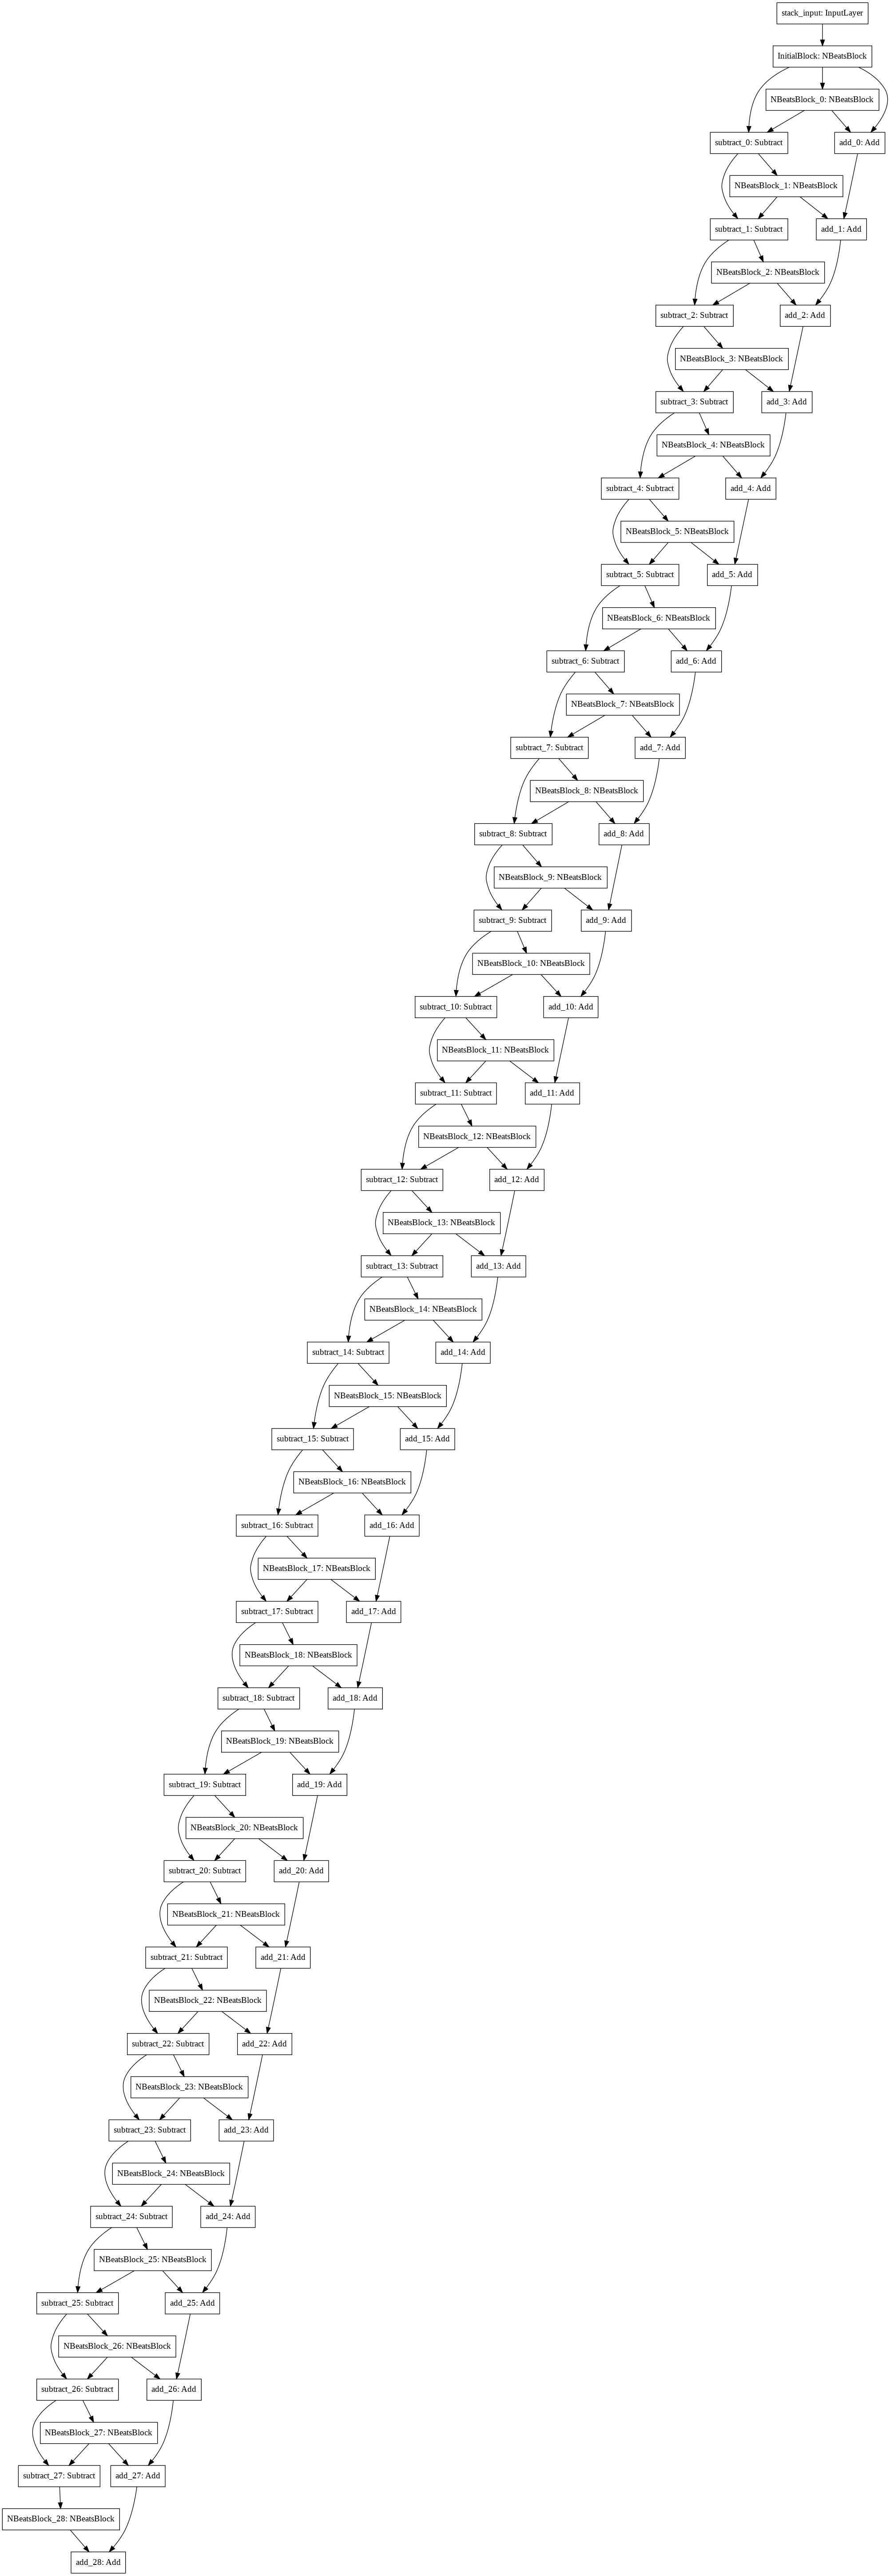

In [147]:
plot_model(model_7)

## Model 8: Creating an ensemble

In [148]:
(HORIZON, WINDOW_SIZE)

(1, 7)

In [149]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  i.e. if num_iter=10, a list of 30 models will be returned.
  """
  # Make an empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
          # Initialize dense layers with normal distribution for estimating predicction interval                         
          tf.keras.layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          tf.keras.layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
          tf.keras.layers.Dense(HORIZON)                    
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100, 
                                                                verbose=1)])
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [150]:
%%time 
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 00817: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 00645: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00745: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 00134: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mae for 1000 epochs, model number: 1
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 00437: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00546: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00646: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 00825: ReduceLR

In [151]:
len(ensemble_models)

15

### Make predictions

In [152]:
# Create a function to make predictions with ensemble
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [153]:
# Create a list of ensemble preds
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

<tf.Tensor: shape=(15, 508), dtype=float32, numpy=
array([[ 9465.197,  9716.144,  9459.334, ..., 61211.2  , 61245.105,
        62030.184],
       [ 9417.609,  9717.188,  9431.366, ..., 61005.055, 61092.   ,
        61849.906],
       [ 9495.032,  9788.017,  9508.313, ..., 60877.477, 61326.36 ,
        62380.98 ],
       ...,
       [ 9464.267,  9662.868,  9588.247, ..., 61174.066, 61211.184,
        62074.598],
       [ 9390.878,  9657.944,  9407.869, ..., 61595.74 , 60535.09 ,
        61939.637],
       [ 9476.523,  9733.703,  9457.513, ..., 61154.758, 61337.46 ,
        61862.844]], dtype=float32)>

In [154]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)
# ensemble_mean

In [155]:
ensemble_median = np.median(ensemble_preds, axis=0)

In [156]:
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=ensemble_median)
ensemble_results

{'mae': 908.46,
 'mape': 2.6201196,
 'mase': 0.99602187,
 'mse': 2039110.9,
 'rmse': 1427.9744}

In [157]:
naive_results

{'mae': 910.8107,
 'mape': 2.6240103,
 'mase': 0.9985991,
 'mse': 2015073.0,
 'rmse': 1419.5327}

### Get 95% confidence prediction intervals

1. Take the predictions from a number of randomly initialized models (from ensembled models)
2. Meaasure the standard deviation of the predictions
3. Multiply the standard deviation by 1.96 (assuming Gaussian/ normal distribution), 95% of observations fall within 1.96 standard deviations.
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/mmedian of the predictions made in (1).

### Plotting confidence prediction intervals

In [158]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions from a number of randomly initialized models

  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(ensemble_preds, axis=0)

  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std 

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [159]:
# Get the upper and lower bounds of the 95% prediction interval
lower, upper = get_upper_lower(preds=ensemble_preds)
#lower, upper

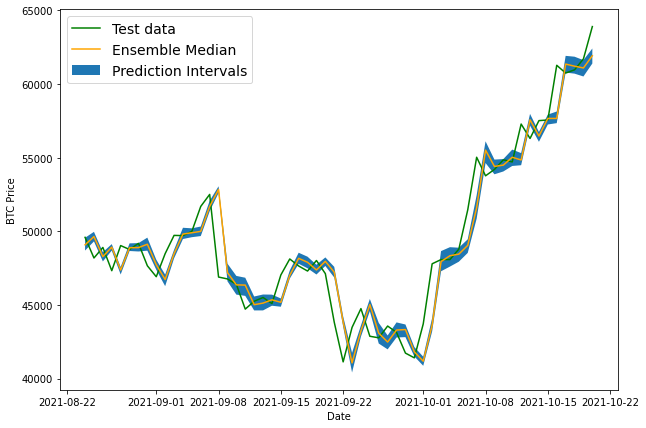

In [160]:
# Get the median/ mean values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)


# Plot the median of our ensemble preds along with the prediction intervals
offset=450
plt.figure(figsize=(10,7))
plt.plot(X_test.index[offset:], y_test[offset:], "-", c="green", label="Test data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "-", c="orange", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")

# To plot upper and lower bounds we'll use fill_between
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14)


## Types of uncertainty in ML

1. **Aleatoric uncertainty** - this type of uncertainty **cannot be reduced** and its often referred as 'data' uncertainty ('subway' uncertainty)

2. **Epistemic uncertainty** - this type of uncertainty **can be reduced**, referred to as 'model' or 'coconut' uncertainty

## Model 9: Train a model on the full historical data to make predictions into the future


In [161]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-11-04,324.71833,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-05,332.45666,25,324.71833,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-06,336.58500,25,332.45666,324.71833,NaN,NaN,NaN,NaN,NaN
2014-11-07,346.77500,25,336.58500,332.45666,324.71833,NaN,NaN,NaN,NaN
2014-11-08,344.81166,25,346.77500,336.58500,332.45666,324.71833,NaN,NaN,NaN


In [162]:
# Train model on entire data to make predictions for next day
X_all = bitcoin_prices_windowed.dropna().drop(['Price', 'block_reward'], axis=1).to_numpy()
# Get labels 
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

len(X_all), len(y_all)

(2536, 2536)

In [163]:
# Turn data into efficient running tensors

features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels 
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimal performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>

In [164]:
tf.random.set_seed(42)

# Create a simple model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(HORIZON)
], name="model_9")

model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit the model on all of the data to make future forecast
model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

### Make predictions into the future

1. Takes as input:
* a list of values (Bitcoin historical data)
* a trained model (`model_9`)
* a window into the future to predict (`INTO_FUTURE`)
* the window size the model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on.

2. Creates an empty list for future forecasts (returned at the end) and extracts the last `WINDOW_SIZE` from the input values.

3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` sequences which update to remove the first value and append the latest prediction.

In [165]:
# How many timesteps
INTO_FUTURE = 14

In [166]:
# 1. Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Make future forecasts into_future steps after values end.

  Returns future forecast as a list of floats.
  """

  #2. Create an empty list for future forecasts
  future_forecast = []
  last_window = values[-WINDOW_SIZE:]

  # 3. Make INTO_FUTURE nummber of predictions, alterinng the data which gets predicted each time
  for _ in range(INTO_FUTURE):
    # Predict on the last window and append (at some point the model will start forecasting on its own forecast)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on:\n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())

    # Update last window with new pred and get WINDOW_SIZE most recent preds
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

  return future_forecast

In [167]:
# Make forecast into the future
future_forecast = make_future_forecasts(values=y_all,
                                        model=model_9,
                                        into_future=INTO_FUTURE,
                                        window_size=WINDOW_SIZE)

Predicting on:
 [57517.12447582 57559.06444208 61273.80527589 60744.98493804
 60965.46543362 61707.48131182 63901.07308021] -> Prediction: 58113.203125

Predicting on:
 [57559.06444208 61273.80527589 60744.98493804 60965.46543362
 61707.48131182 63901.07308021 58113.203125  ] -> Prediction: 59833.375

Predicting on:
 [61273.80527589 60744.98493804 60965.46543362 61707.48131182
 63901.07308021 58113.203125   59833.375     ] -> Prediction: 61831.4375

Predicting on:
 [60744.98493804 60965.46543362 61707.48131182 63901.07308021
 58113.203125   59833.375      61831.4375    ] -> Prediction: 61802.50390625

Predicting on:
 [60965.46543362 61707.48131182 63901.07308021 58113.203125
 59833.375      61831.4375     61802.50390625] -> Prediction: 61551.76171875

Predicting on:
 [61707.48131182 63901.07308021 58113.203125   59833.375
 61831.4375     61802.50390625 61551.76171875] -> Prediction: 62582.71875

Predicting on:
 [63901.07308021 58113.203125   59833.375      61831.4375
 61802.50390625 61

In [168]:
future_forecast

[58113.203,
 59833.375,
 61831.438,
 61802.504,
 61551.76,
 62582.72,
 61665.887,
 59601.117,
 61415.72,
 62542.594,
 62235.96,
 62146.363,
 62371.207,
 61341.79]

### Plot our predictions into the future

In [169]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values ranging from start_date to start_date+into_future
  """

  start_date = start_date + np.timedelta64(offset, "D") #specify start date, D - for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date
  



In [170]:
# Last timestep of timesteps (should be in np.datetime64)
last_timestep = btc_df.index[-1]
last_timestep

Timestamp('2021-10-20 00:00:00')

In [171]:
# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-10-21', '2021-10-22', '2021-10-23', '2021-10-24',
       '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28',
       '2021-10-29', '2021-10-30', '2021-10-31', '2021-11-01',
       '2021-11-02', '2021-11-03'], dtype='datetime64[D]')

In [172]:
# Insert last timestep/ final price into next time steps and future forecasts so the plot doesn't look jenky
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
len(next_time_steps), len(future_forecast)

(15, 15)

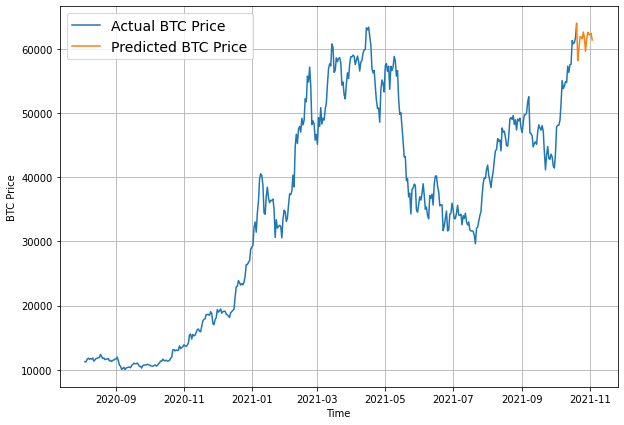

In [173]:
# Plot future prices predictions of Bitcoin
plt.figure(figsize=(10,7))
plot_time_series(btc_df.index, btc_price, start=2100, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")

## Model 10: Issues with forecasting

In [174]:
# Let's introduce a turkey problem (unexpected event) to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100

In [175]:
# Manufacture an extra price on the end (to showcase our turkey problem)
btc_price_turkey[-10:]

[54712.7211663833,
 57284.9213859839,
 56304.2388376736,
 57517.1244758226,
 57559.064442077,
 61273.805275885,
 60744.9849380446,
 60965.4654336171,
 61707.4813118213,
 639.010730802098]

In [176]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(btc_df.index)
btc_timesteps_turkey[-10:]

array(['2021-10-11T00:00:00.000000000', '2021-10-12T00:00:00.000000000',
       '2021-10-13T00:00:00.000000000', '2021-10-14T00:00:00.000000000',
       '2021-10-15T00:00:00.000000000', '2021-10-16T00:00:00.000000000',
       '2021-10-17T00:00:00.000000000', '2021-10-18T00:00:00.000000000',
       '2021-10-19T00:00:00.000000000', '2021-10-20T00:00:00.000000000'],
      dtype='datetime64[ns]')

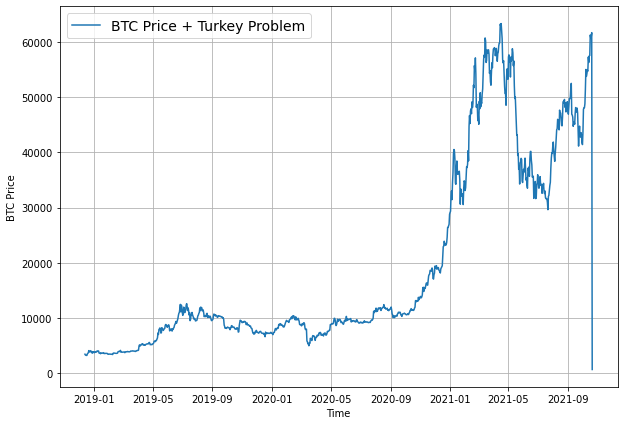

In [177]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=1500)

In [178]:
HORIZON = 1
WINDOW_SIZE = 7

In [179]:
# Create train aand test sets for turkey problem
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)

In [180]:
len(X_train), len(X_test), len(y_train), len(y_test)

(2028, 508, 2028, 508)

### Build the model

In [181]:
# Clone model 1 and fit on the new data
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())

turkey_model.fit(X_train, y_train, 
                 epochs=100,
                 verbose=100,
                 batch_size=128,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])




Epoch 1/100
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
Epoch 2/100
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
Epoch 3/100
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
Epoch 4/100
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
Epoch 5/100
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
Epoch 6/100
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
Epoch 7/100
Epoch 8/100
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
Epoch 9/100
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
Epoch 10/100
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
Epoch 11/100
INFO:tensorflow:Assets written to: model_experiments/model_10_turkey_model/assets
Epoch 12/100
INFO:tensorflow:Assets written to

In [182]:
# Evaluate model on test data
turkey_model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 1040.4216


1040.421630859375

In [183]:
# Load best performing turkey model and evaluate on test data
turkey_model = tf.keras.models.load_model("/content/model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 1026.3655


1026.365478515625

In [184]:
# Make predictions with turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 9475.78 ,  9671.183,  9490.839, 10157.18 ,  9704.309,  9613.123,
        9826.037,  9659.669,  9729.745,  9703.311], dtype=float32)>

In [185]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 20050.17,
 'mape': 108.173096,
 'mase': 19.500027,
 'mse': 620883200.0,
 'rmse': 24481.143}

In [186]:
model_1_results

{'mae': 919.3893,
 'mape': 2.6436763,
 'mase': 1.0080045,
 'mse': 2058842.2,
 'rmse': 1434.8667}

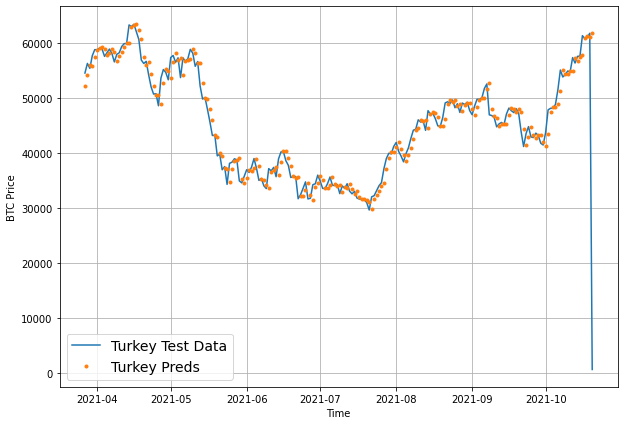

In [187]:
plt.figure(figsize=(10,7))
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data",
                 start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(y_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset)

## Compare models results

In [188]:
# Compare different model results (w = window, h = horizon)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_Conv1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_7_NBEATS": model_7_results,
                              "model_8_ensemble": ensemble_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,910.810730,2.015073e+06,1419.532715,2.624010,0.998599
model_1_dense_w7_h1,919.389282,2.058842e+06,1434.866699,2.643676,1.008005
model_2_dense_w30_h1,986.032776,2.312258e+06,1520.610962,2.804600,1.075408
model_3_dense_w30_h7,2032.057373,1.000246e+07,2327.512939,5.730958,2.226647
model_4_Conv1D,921.289368,2.074823e+06,1440.424561,2.652610,1.010088
model_5_LSTM,979.349426,2.261720e+06,1503.901611,2.821292,1.073744
model_6_multivariate,903.631226,2.001406e+06,1414.710449,2.602878,0.990728
model_7_NBEATS,909.858887,2.048206e+06,1431.155396,2.620860,0.997556
model_8_ensemble,908.460022,2.039111e+06,1427.974365,2.620120,0.996022
model_10_turkey,20050.169922,6.208832e+08,24481.142578,108.173096,19.500027


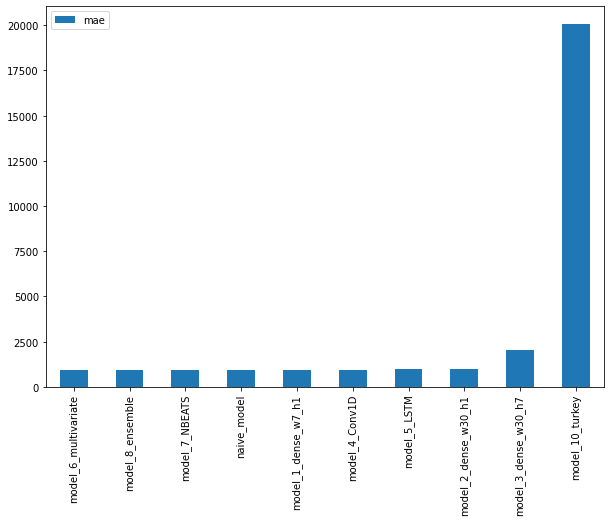

In [189]:
# Sort models results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar")